In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Timestepping

The purpose of this notebook is to investigate the properties of several of the most common timestepping schemes in the context of several standard test problems.

## Forward Euler
Recall that the forward Euler approximation for an equation of the form $y' = f(t, y)$ is:
\begin{equation*}
y_{n+1} = y_n + \Delta t f(t, y_n)
\end{equation*}

In [2]:
def forward_euler(t, y, dt, f, df, **kwargs):
    return y + dt * f(t, y, **kwargs)

## Backward Euler

In [3]:
def backward_euler(t, y, dt, f, df, **kwargs):
    return ((1.0 - dt * df(t, y, **kwargs)) * y + \
        dt * f(t, y, **kwargs)) / \
        (1.0 - dt * df(t, y, **kwargs))

## Trapezoidal

In [4]:
def trapezoidal(t, y, dt, f, df, theta = 0.5, **kwargs):
    return (1.0 - theta) * forward_euler(t, y, dt, f, df, **kwargs) + \
            theta * backward_euler(t, y, dt, f, df, **kwargs)

## Runge-Kutta 4

In [5]:
def RK4(t, y, dt, f, df, **kwargs):
    k1 = f(t, y,**kwargs)
    k2 = f(t+dt/2, y+dt*k1/2, **kwargs)
    k3 = f(t+dt/2, y+dt*k2/2, **kwargs)
    k4 = f(t+dt, y+dt*k3, **kwargs)
    return y + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

## Dahlquist Equation

In [6]:
def dahlquist(t, y, lamda=-1):
    return lamda * y

In [7]:
def ddahlquistdy(t, y, lamda=-1):
    return lamda

In [8]:
def dahlquist_exact(t, y, dt, f, df, lamda=-1):
    return y * math.exp(lamda * dt)

## Lorentz Equation

In [9]:
def lorentz(t, y, sigma=10.0, rho=28.0, beta=8.0/3.0):
    return np.array([sigma*(y[1]-y[0]), y[0]*(rho-y[2])-y[1], y[0]*y[1]-beta*y[2]])

In [10]:
def dlorentzdy(t, y, sigma=10.0, rho=28.0, beta=8.0/3.0):
    return 0

## Solver

In [11]:
def solver(y0, dt, t_max, f, df, integrator, **kwargs):
    # initialise t and x:
    t = 0
    yn = y0

    # lists to store output
    times = [t]
    sol = [y0]

    # timeloop
    while t < t_max:

        # update y and t
        ynp1 = integrator(t, yn, dt, f, df, **kwargs)
        t += dt

        # store values
        times.append(t)
        sol.append(ynp1)

        # update yn for next iteration
        yn = ynp1

    return times, sol

## Excercise 1

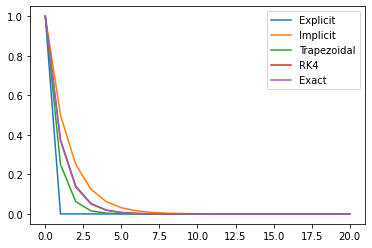

In [18]:
# Parameters
y0 = 1
dt = 1.0
t_max = 20

# Equation
f, df = dahlquist, ddahlquistdy

# Solutions
times, sol_exp = solver(y0, dt, t_max, f, df, forward_euler)
times, sol_imp = solver(y0, dt, t_max, f, df, backward_euler)
times, sol_trap = solver(y0, dt, t_max, f, df, trapezoidal)
times, sol_RK4 = solver(y0, dt, t_max, f, df, RK4)
times, sol_exact = solver(y0, dt, t_max, f, df, dahlquist_exact)

# Plot solutions
plt.figure()
plt.plot(times, sol_exp, label = 'Explicit')
plt.plot(times, sol_imp, label = 'Implicit')
plt.plot(times, sol_trap, label = 'Trapezoidal')
plt.plot(times, sol_RK4, label = 'RK4')
plt.plot(times, sol_exact, label = 'Exact')
plt.legend()
plt.show()

## Excercise 2

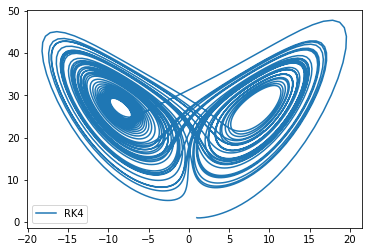

In [17]:
# Parameters
y0 = np.array([1., 1., 1.])
dt = 0.01
t_max = 50

# Equation
f, df = lorentz, dlorentzdy

# Solutions
#times, sol_exp = solver(y0, dt, t_max, f, df, forward_euler)
#x_euler = [sol_exp[i][0] for i in range(len(sol_RK4))]
#y_euler = [sol_exp[i][1] for i in range(len(sol_RK4))]
#z_euler = [sol_exp[i][2] for i in range(len(sol_RK4))]
times, sol_RK4 = solver(y0, dt, t_max, f, df, RK4)
x_RK4 = [sol_RK4[i][0] for i in range(len(sol_RK4))]
y_RK4 = [sol_RK4[i][1] for i in range(len(sol_RK4))]
z_RK4 = [sol_RK4[i][2] for i in range(len(sol_RK4))]

# Plot solutions
#plt.figure()
#plt.plot(x_euler, y_euler, label = 'Explicit')
#plt.legend()
plt.figure()
plt.plot(x_RK4, z_RK4, label = 'RK4')
plt.legend()
plt.show()

### Exercises
1. Experiment with $\Delta t$ and $\lambda$ to confirm that the method is stable for $\lambda\Delta t < 1$.

## Other methods
### Exercises
1. Implement the backward Euler method and verify its stability.
2. Implement the theta method and verify its stability.
3. Implement the implicit midpoint method and verify its stability.

## Systems of equations
### Exercises
1. Use forward Euler to solve the Lorenz equations: https://en.wikipedia.org/wiki/Lorenz_system
2. Write an RK4 timestepper for the Lorenz equations: https://en.wikipedia.org/wiki/Runge–Kutta_methods